In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('aerofit_treadmill.csv')

data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
data.shape

(180, 9)

In [8]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [54]:
# Unique Values in all columns

In [60]:
for i in df.columns:
    print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [61]:
# Cheking the value counts for Categorical Colums

In [67]:
data['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [68]:
data['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [69]:
data['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [70]:
data['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [71]:
data['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [72]:
data['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [48]:
# Outliers

<Axes: xlabel='Income'>

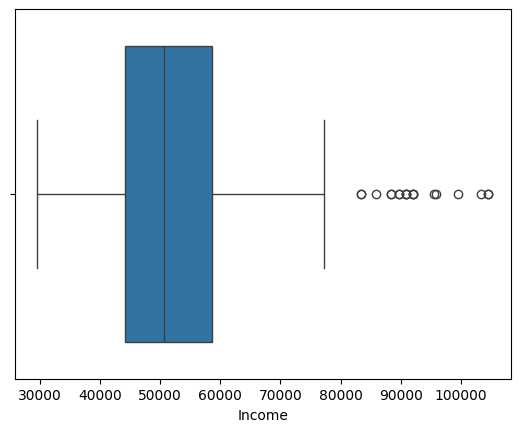

In [50]:
sns.boxplot(x='Income',data = df)

<Axes: xlabel='Miles'>

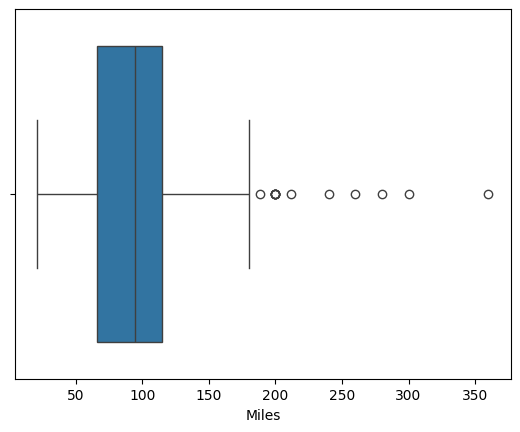

In [51]:
sns.boxplot(x='Miles',data = df)

<Axes: xlabel='Age'>

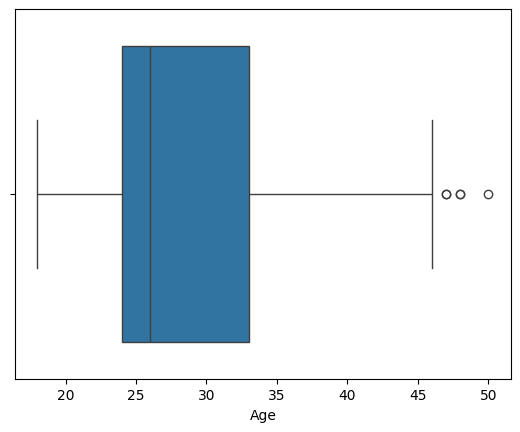

In [52]:
sns.boxplot(x='Age',data = df)

In [73]:
data_copy = data.copy()

In [76]:
data_copy['Gender'].replace(['Male','Female'],[1,0],inplace = True)

data_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

data_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

data_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


<Axes: >

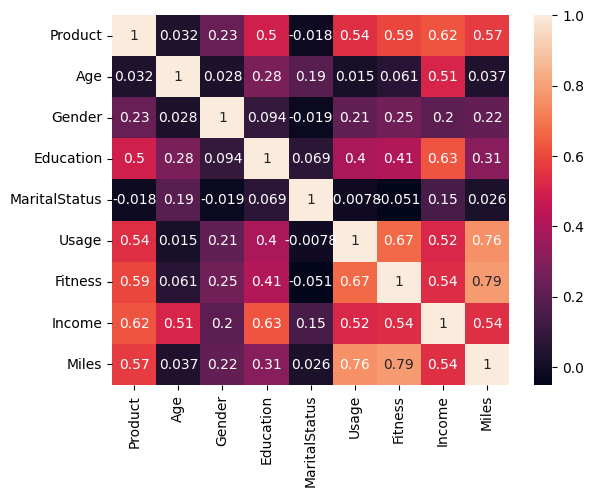

In [78]:
sns.heatmap(data_copy.corr(),annot = True)

The product/treadmill purchased highly correlates with Education, Income, Usage, Fitness and Miles

Age is highly correlated to Income (0.51) which definitely seems reasonable. It's also correlated with Education and Marital Status which stands completely alright.

Gender certainly has some correlation to Usage, Fitness, Income and Miles.

Education is correlated to Age and Miles. It's highly correlated to Income (as expected). It's sufficiently correlated to Usage and Fitness too.

Marital Status has some correlation to Income and Age (as expected).

Usage is extremely correlated to Fitness and Miles and has a higher correlation with Income as well.

Fitness has a great correlation with Income.

In [83]:
# Not removong the Ouliers from the dataset and all the data items will be used in the analysis

In [81]:
cols=['Age', 'Income', 'Miles']
for col in cols:
    percentiles = data[col].quantile([0.05,0.95]).values
    data_copy[col] = np.clip(data_copy[col], percentiles[0], percentiles[1])

In [10]:
# Bivariate

# Checking the relation between Education and Income

<Axes: xlabel='Education', ylabel='Income'>

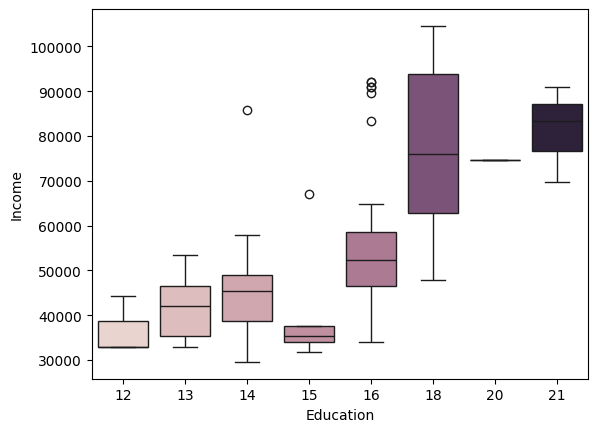

In [15]:
sns.boxplot(data= data, x = 'Education', y = 'Income',hue='Education',legend = False)

<Axes: xlabel='Gender', ylabel='Income'>

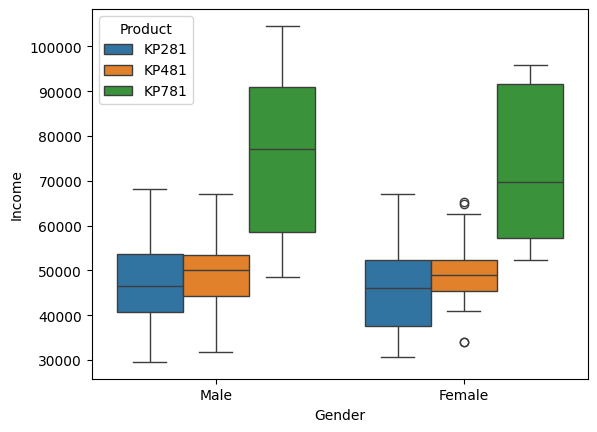

In [16]:
sns.boxplot(data= data, x = 'Gender', y = 'Income',hue='Product')

In [17]:
# Checking the Distribution Between the Variables

<Axes: xlabel='Miles', ylabel='Income'>

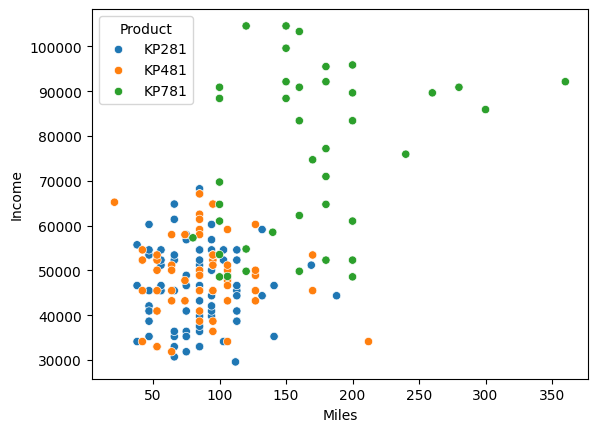

In [19]:
sns.scatterplot(x='Miles',y='Income',hue='Product',data = data)

<Axes: xlabel='Usage', ylabel='Income'>

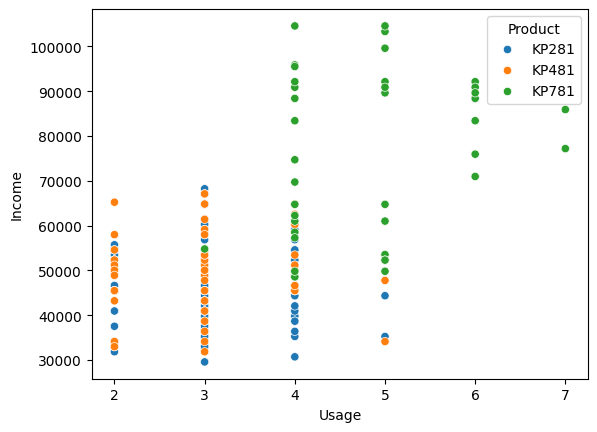

In [20]:
sns.scatterplot(x='Usage',y='Income',hue='Product',data = data)

<Axes: xlabel='Usage', ylabel='Miles'>

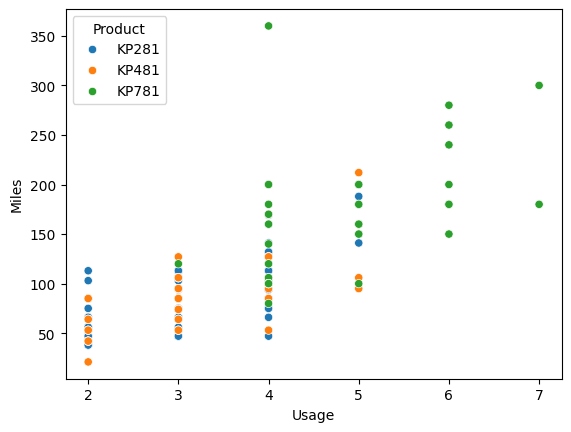

In [21]:
sns.scatterplot(x='Usage',y='Miles',hue='Product',data = data)

<Axes: xlabel='Age', ylabel='Income'>

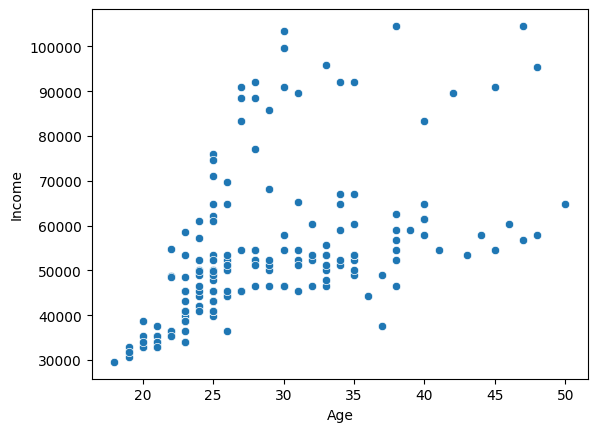

In [103]:
sns.scatterplot(x='Age',y='Income',data = data)

<Axes: xlabel='Age', ylabel='Miles'>

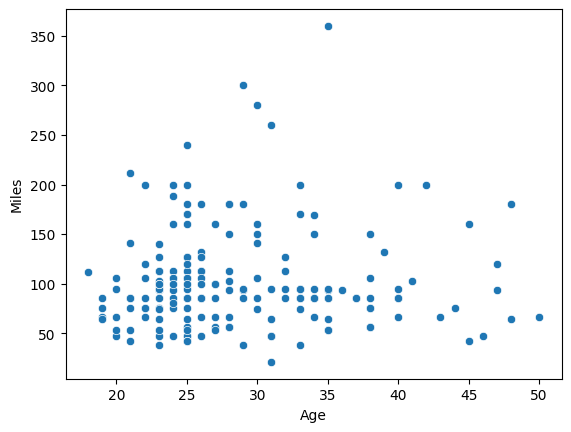

In [104]:
sns.scatterplot(x='Age',y='Miles',data = data)

In [126]:
bins = [-1,20,25,30,35,40,55]

labels = ['<20','20-25','25-30','30-35','35-40','40+']


data['Age_Bins'] = pd.cut(data['Age'],bins = bins,labels = labels)

/var/folders/j3/wdpd49qs0zg3pt8yv5g_97vh0000gn/T/ipykernel_42921/77932160.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Green'` for the same effect.

  sns.countplot(data = data,x='Age_Bins',hue= 'Product',color='Green')


<Axes: xlabel='Age_Bins', ylabel='count'>

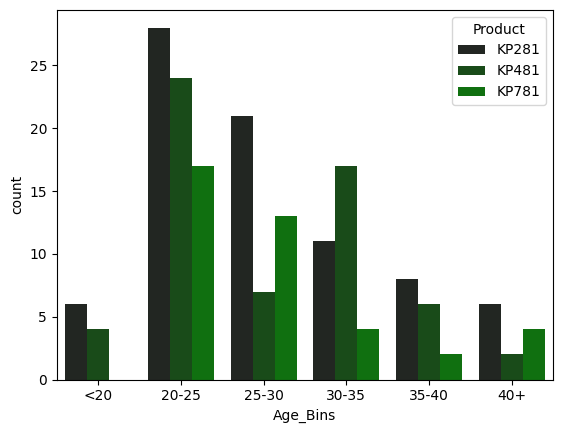

In [127]:
sns.countplot(data = data,x='Age_Bins',hue= 'Product',color='Green')

In [128]:
pd.crosstab(index = data['Age_Bins'],columns = data['Product'],margins = True)

Product,KP281,KP481,KP781,All
Age_Bins,,,,
<20,6,4,0,10
20-25,28,24,17,69
25-30,21,7,13,41
30-35,11,17,4,32
35-40,8,6,2,16
40+,6,2,4,12
All,80,60,40,180


In [129]:
pd.crosstab(index = data['Age_Bins'],columns = data['Product'],margins = True,normalize = True)*100

Product,KP281,KP481,KP781,All
Age_Bins,,,,
<20,3.333333,2.222222,0.000000,5.555556
20-25,15.555556,13.333333,9.444444,38.333333
25-30,11.666667,3.888889,7.222222,22.777778
30-35,6.111111,9.444444,2.222222,17.777778
35-40,4.444444,3.333333,1.111111,8.888889
40+,3.333333,1.111111,2.222222,6.666667
All,44.444444,33.333333,22.222222,100.000000


In [131]:
pd.crosstab(index = data['Age_Bins'],columns = data['Product'],margins = True,normalize = 'index')*100

Product,KP281,KP481,KP781
Age_Bins,,,
<20,60.000000,40.000000,0.000000
20-25,40.579710,34.782609,24.637681
25-30,51.219512,17.073171,31.707317
30-35,34.375000,53.125000,12.500000
35-40,50.000000,37.500000,12.500000
40+,50.000000,16.666667,33.333333
All,44.444444,33.333333,22.222222


In [132]:
bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
data['Mile_bins'] = pd.cut(data['Miles'], bins=bins, labels=labels)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,<50


<Axes: xlabel='Mile_bins', ylabel='count'>

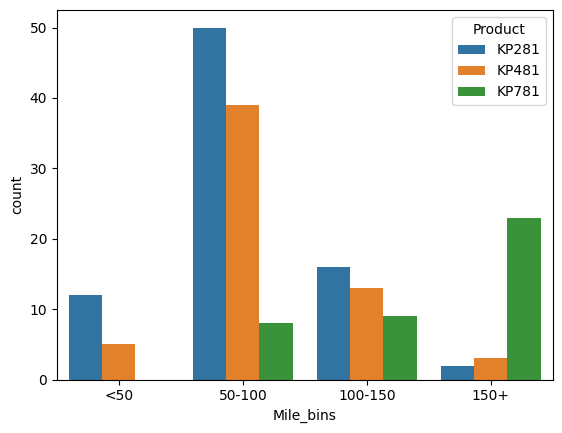

In [133]:
sns.countplot(data = data,x='Mile_bins',hue= 'Product')

In [134]:
pd.crosstab(index = data['Mile_bins'],columns = data['Product'],margins = True,normalize = 'index')*100

Product,KP281,KP481,KP781
Mile_bins,,,
<50,70.588235,29.411765,0.000000
50-100,51.546392,40.206186,8.247423
100-150,42.105263,34.210526,23.684211
150+,7.142857,10.714286,82.142857
All,44.444444,33.333333,22.222222


In [135]:
bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
data['Income_bins'] = pd.cut(data['Income'], bins=bins, labels=labels)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Mile_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,100-150,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,50-100,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,50-100,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,50-100,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,<50,35000-45000


<Axes: xlabel='Income_bins', ylabel='count'>

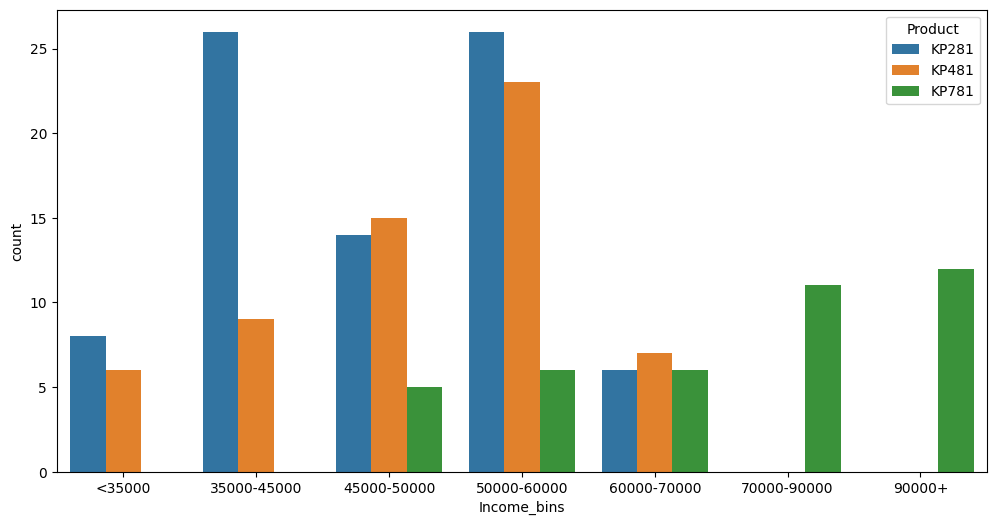

In [137]:
plt.figure(figsize=(12,6))
sns.countplot(data = data,x='Income_bins',hue= 'Product')

In [138]:
pd.crosstab(index = data['Income_bins'],columns = data['Product'],margins = True,normalize = 'index')*100

Product,KP281,KP481,KP781
Income_bins,,,
<35000,57.142857,42.857143,0.000000
35000-45000,74.285714,25.714286,0.000000
45000-50000,41.176471,44.117647,14.705882
50000-60000,47.272727,41.818182,10.909091
60000-70000,31.578947,36.842105,31.578947
70000-90000,0.000000,0.000000,100.000000
90000+,0.000000,0.000000,100.000000
All,44.444444,33.333333,22.222222


In [30]:
# Conditional and Joint Probability

In [33]:
pd.crosstab(index = data['Gender'],columns =data['Product'],margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [35]:
pd.crosstab(index = data['Gender'],columns =data['Product'],normalize = True, margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [38]:
# Joint Probability
pd.crosstab(index = data['Gender'],columns =data['Product'],normalize = True, margins = True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [39]:
# Conditional Probability

In [42]:
pd.crosstab(index = data['Gender'],columns =data['Product'],normalize = 'index', margins = True)*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


**Customer Profiles for KP781**

1) Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.
   2) Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
       a) Education Level >= 18
       b) Usage days > = 5 
       c) Fitness Levels = 5 
       d) The person runs more than 150 miles(80% of them use KP781)

**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40 
<br>
2) Customers having income in range 60k-70k and usage days=3 
<br>
3) Customers having income in range 45k-50k and usage days=2
<br> 
4) Customers having income in range 35k-45k and usage days=4 
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k



**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37 
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105